In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[99, 9, 7]


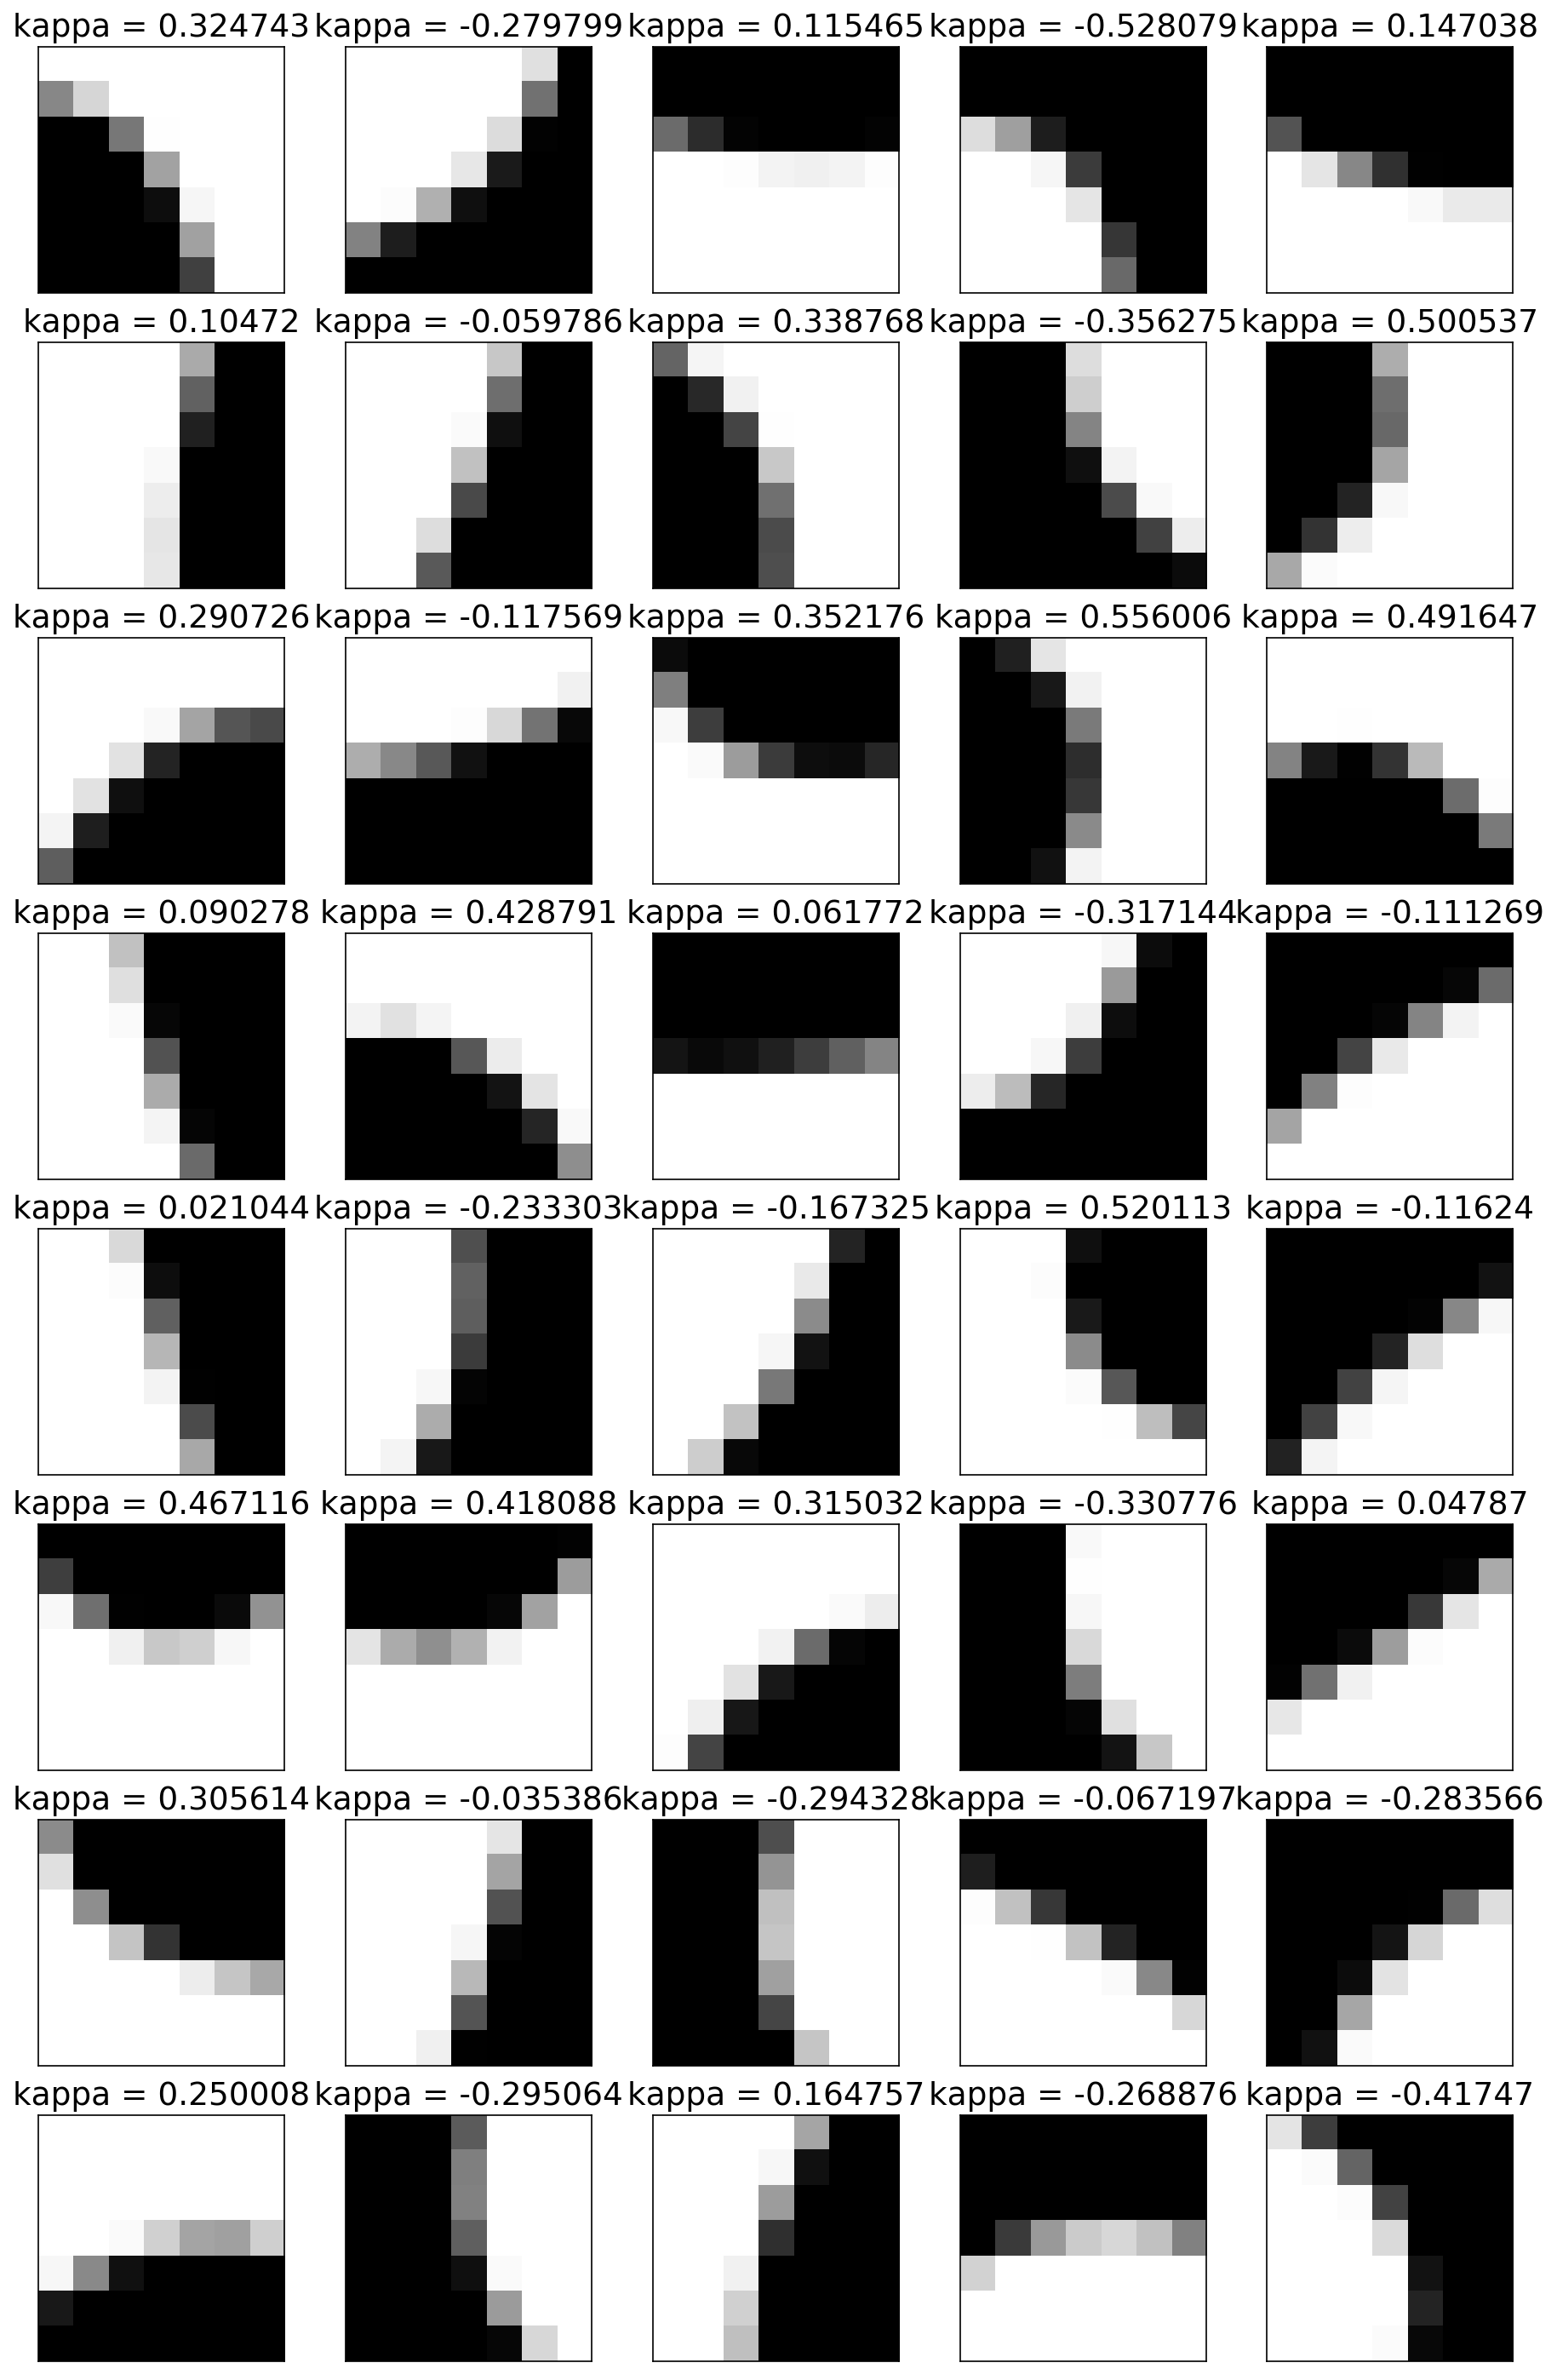

In [67]:
#filename = 'data_5x5_eqk_neg_ellre.feather'
filename = 'data_7x7_eqk_neg_ell_nsm_opt.feather'
file = pd.read_feather(filename)
#file = file[(file.iloc[:, 0] > 0.493) & (file.iloc[:, 0] < 0.494)]

debug = False
if not debug:
    features = file.iloc[:, 1:]
    labels = file.iloc[:, 0]
else:
    pt_x = file.iloc[:, 0]
    pt_y = file.iloc[:, 1]
    e = file.iloc[:, 2]
    r = file.iloc[:, 3]
    labels = file.iloc[:, 4]
    features = file.iloc[:, 5:]
print([int(features.shape[0]), int(np.sqrt(features.shape[0])), int(np.sqrt(features.shape[1]))])
features = np.reshape(features.values, (int(features.shape[0]), int(np.sqrt(features.shape[1])), int(np.sqrt(features.shape[1]))))

number_of_plots = 40
per_row = 5
fig, ax = plt.subplots(int(number_of_plots/per_row), per_row, figsize=(3*per_row, 3*number_of_plots/per_row), dpi=150)
for idx_st, a_stack in enumerate(ax):
    for idx, a in enumerate(a_stack):
        a.imshow(features[idx+int(idx_st*number_of_plots/per_row)], cmap='Greys_r')
        a.get_xaxis().set_ticks([])
        a.get_yaxis().set_ticks([])
        if not debug:
            kappa = labels.iloc[idx + int(idx_st*number_of_plots/per_row)]
            a.set_title(f'kappa = {np.round(kappa, 6)}', fontsize=18)
        else:
            kappa = labels.iloc[idx + int(idx_st*number_of_plots/per_row)]
            e_prt = e.iloc[idx + int(idx_st*number_of_plots/per_row)]
            a.set_title(f'e: {np.round(e_prt, 3)}, k: {np.round(kappa, 3)}', fontsize=12)

In [40]:
file.iloc[:, 0].nunique()

100

In [41]:
[file.iloc[:, 0].max(), file.iloc[:, 0].min(), np.abs(file.iloc[:, 0]).min()]

[1.48674869818958, -0.8319882442332097, 6.0184867104210935e-05]

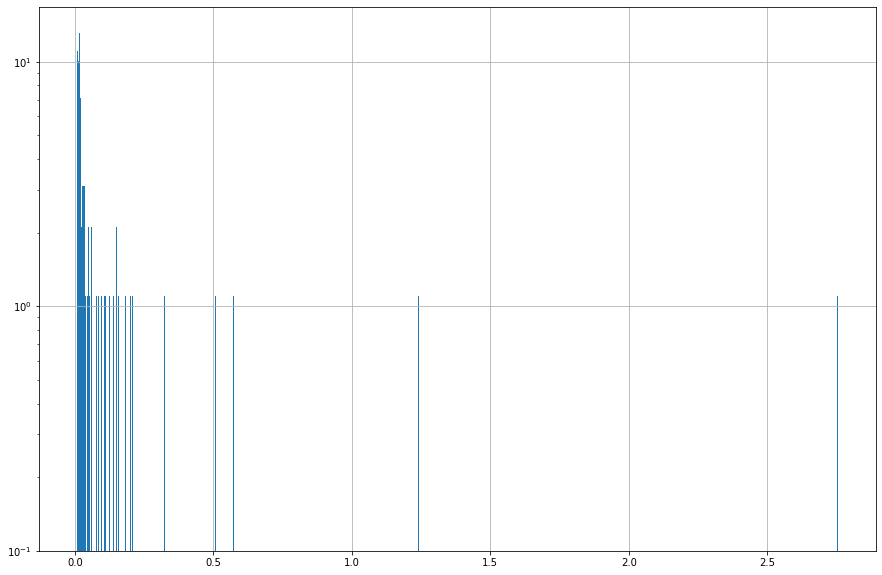

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
r.hist(ax=ax, bins=1000, bottom=0.1)
ax.set_yscale('log')

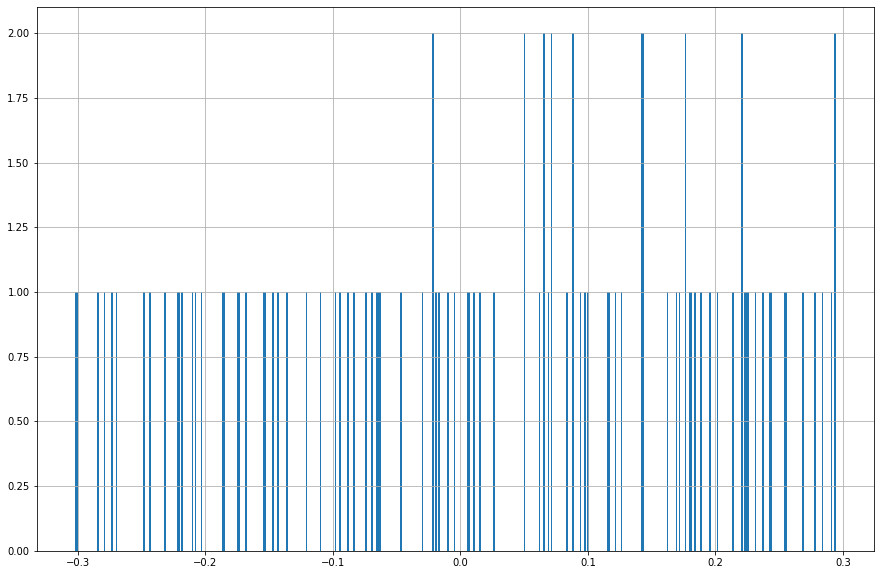

In [43]:
labels.hist(bins=int(2/0.004), figsize=(15,10))

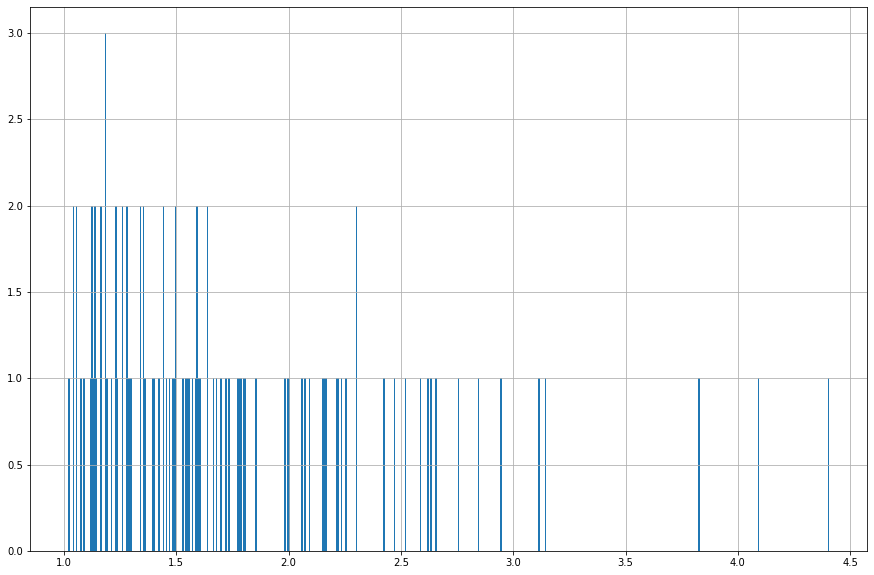

In [44]:
e.hist(bins=500, figsize=(15,10))

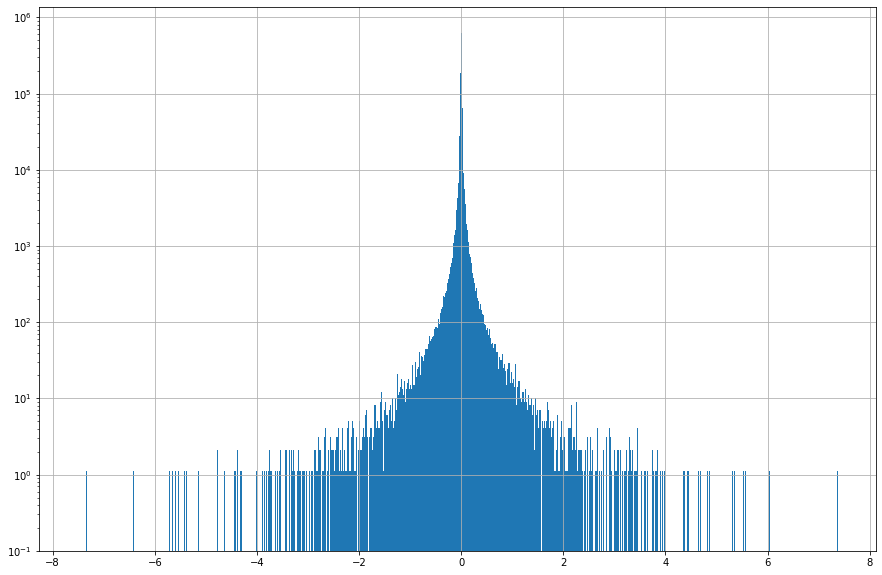

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
pt_x.hist(ax=ax, bins=1000, bottom=0.1)
ax.set_yscale('log')

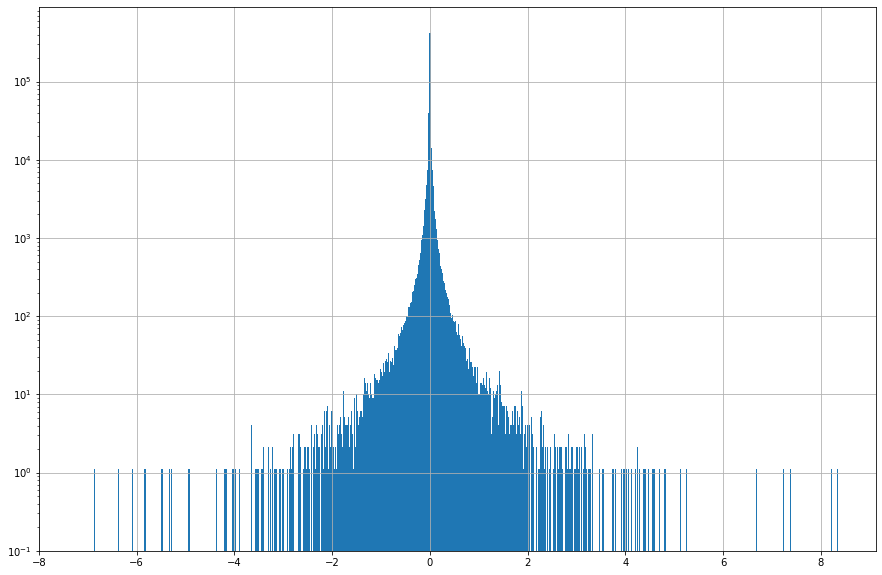

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
pt_y.hist(ax=ax, bins=1000, bottom=0.1)
ax.set_yscale('log')

Von kappa_min bis kappa_max alles abgedeckt. Dass es um 0 rum keine Werte gibt, liegt an kappa_min > 0.

In [12]:
file.iloc[:, int(file.shape[1]/2)].nunique()

8193

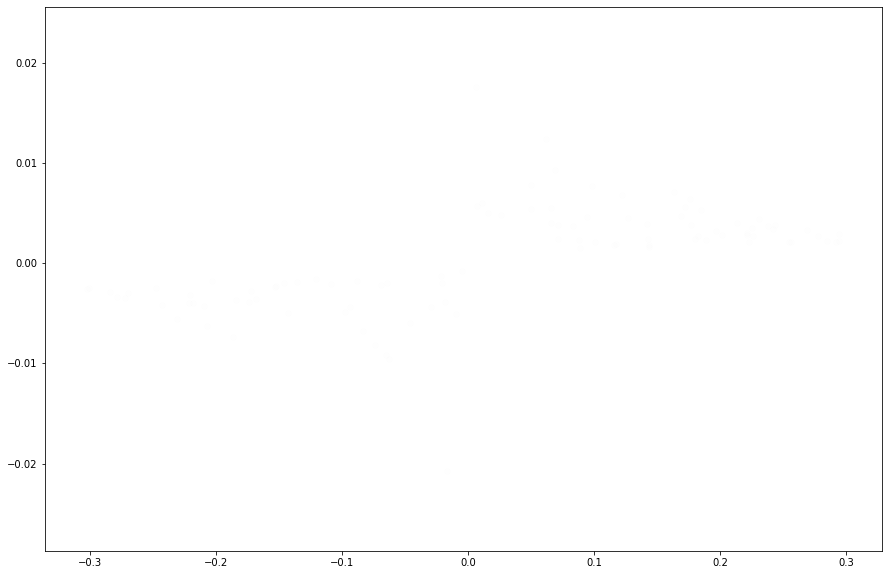

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(labels, r*labels, alpha=0.002)

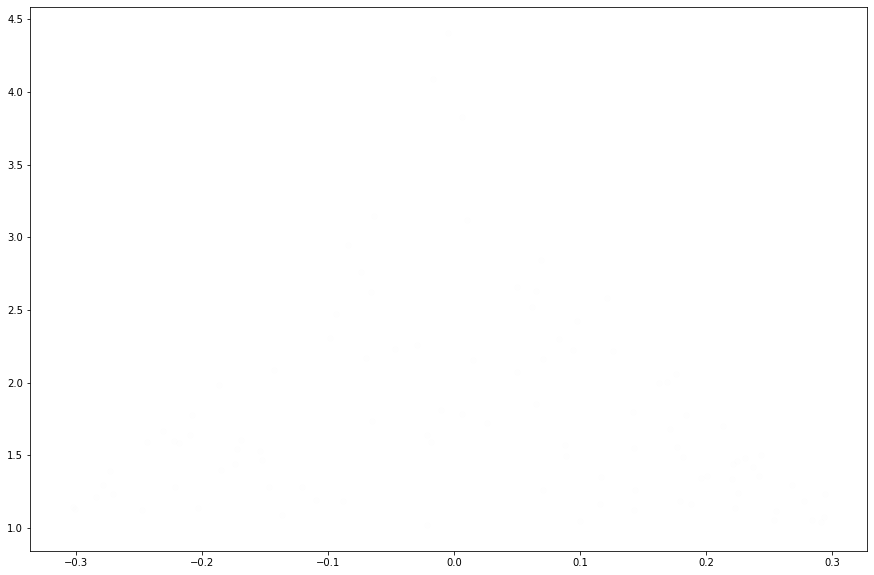

In [48]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(labels, e, alpha=0.002)

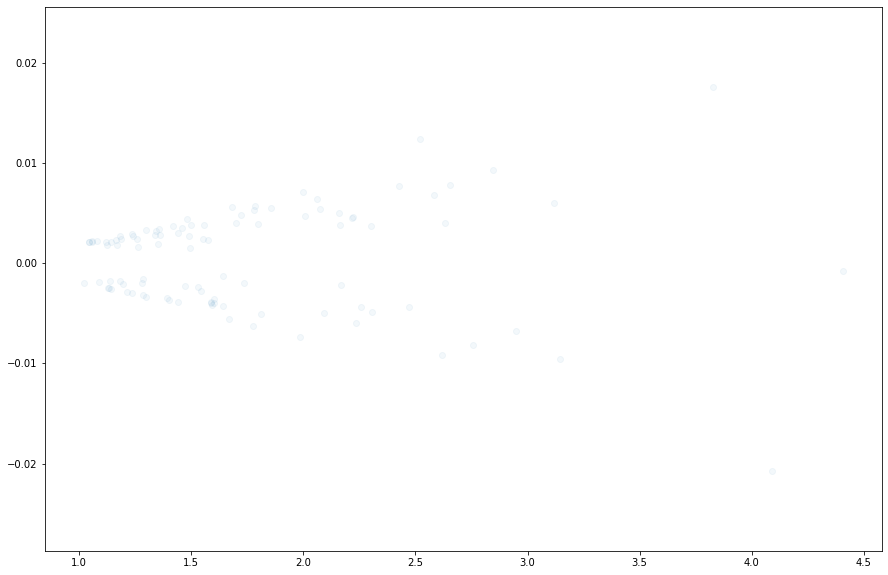

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(e, r*labels, alpha=0.05)
# ax.set_yscale('log')

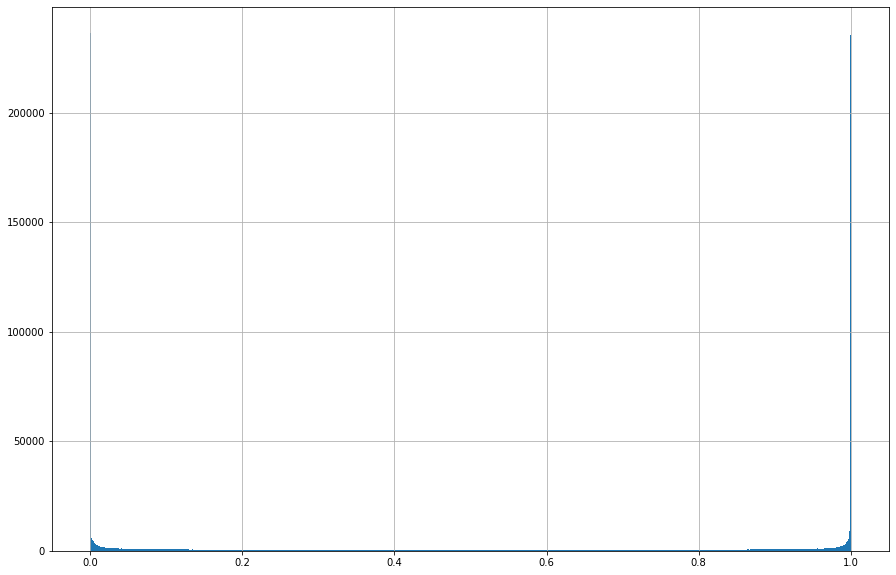

In [16]:
file.iloc[:, int(file.shape[1]/2)].hist(bins=1023, figsize=(15,10))

Die Spikes sind etwas seltsam, hängen auch von der Wahl der Auflösung des Histogramms ab.

In [51]:
sum = file.sum(axis=1)
sum.nunique()

100

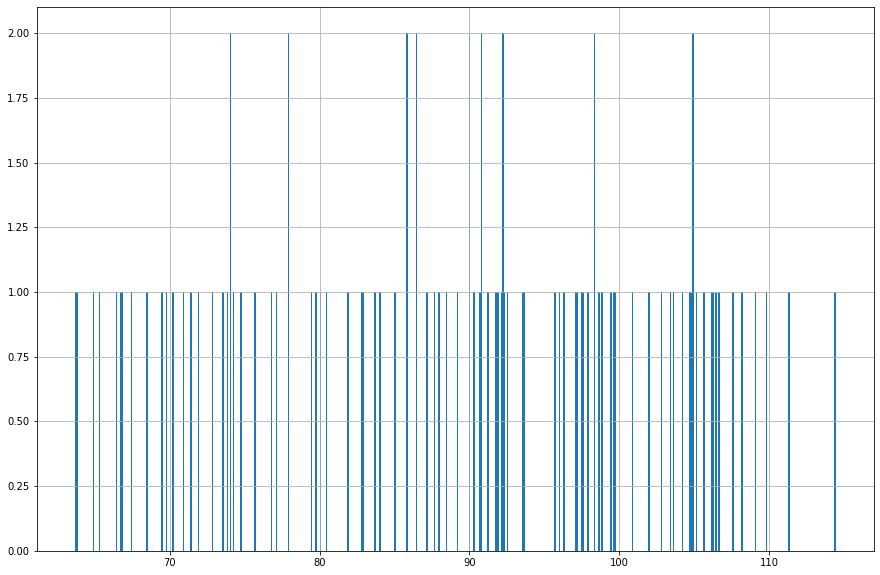

In [52]:
sum.hist(bins=500, figsize=(15, 10))